# Exploratory Data Analysis of IPL Dataset

## 1. Introduction
This project performs EDA on IPL data to understand team performance trends.

## 2. Dataset Overview
- matches.csv: Match-level data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches = pd.read_csv("matches.csv")

## EDA on matches.csv
### Basic Information


In [39]:
matches.shape

(1095, 20)

In [40]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### Initial Observations
- The dataset contains 1095 IPL matches with 20 columns.
- Missing values are present in city, winner, player_of_match, result_margin, and target-related columns.
- The `season` and `date` columns are stored as object types and may require conversion.
- The `method` column is mostly null, indicating DLS was applied only in a few matches.

In [41]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [42]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

CLEANING THE DATA

In [43]:
matches['city']= matches['city'].fillna('Unkown')
matches['player_of_match']= matches['player_of_match'].fillna('No POM')
matches['winner']= matches['winner'].fillna('No Winner')

In [44]:
matches[['city','winner','player_of_match']].isnull().sum()

city               0
winner             0
player_of_match    0
dtype: int64

ANALYSIS

In [45]:
top_teams= matches['winner'].value_counts().head(10)
top_teams

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

### Visualization: Team-wise Match Wins

In [46]:
top_teams_df = top_teams.reset_index()
#top_teams.columns = ['team','wins']
top_teams_df

,winner,count
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


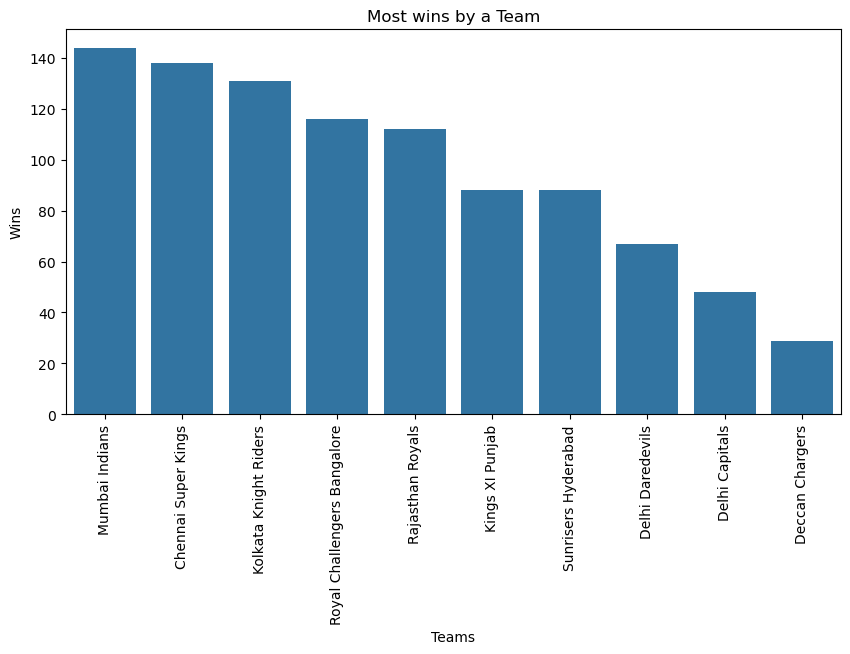

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_teams_df,x='winner',y='count')
plt.title("Most wins by a Team")
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

**Insight:**  
Mumbai Indians and Chennai Super Kings have the highest number of match wins, indicating their sustained dominance across IPL seasons.


### Impact of Toss on Match Outcome


In [48]:
matches['toss_match_result'] = np.where(
    matches['toss_winner'] == matches['winner'],
    'Toss winner won match',
    'Toss winner lost match'
)
#matches.head()

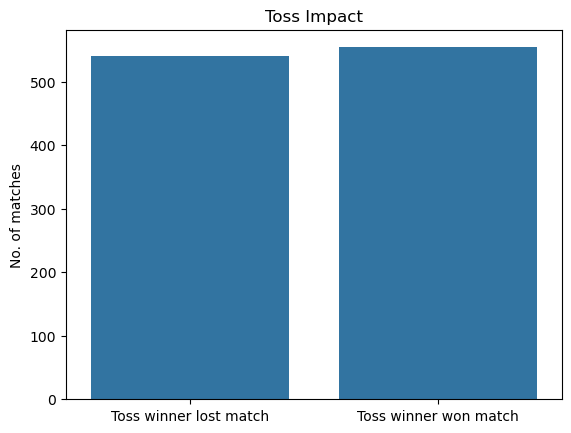

In [49]:
sns.countplot(data=matches,x='toss_match_result')
plt.title('Toss Impact')
plt.xlabel('')
plt.ylabel('No. of matches')
plt.show()

In [50]:
matches['toss_match_result'].value_counts()

toss_match_result
Toss winner won match     554
Toss winner lost match    541
Name: count, dtype: int64

**Insight:**
Toss winner won match   - 554
Toss winner lost match   - 541,
Winning the toss provides a slight advantage, but nearly half the matches are still won by the team losing the toss.

### Batting First vs Bowling First – Match Outcome Analysis


In [51]:
matches[['toss_winner','toss_decision','team1','team2','winner']]

,toss_winner,toss_decision,team1,team2,winner
0,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Chennai Super Kings,bat,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,Rajasthan Royals,bat,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,Deccan Chargers,bat,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...,...
1090,Punjab Kings,bat,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad
1091,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
1092,Rajasthan Royals,field,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals
1093,Rajasthan Royals,field,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad


In [52]:
def get_bat_first(row):
    if row['winner']=='No Winner':
        return np.nan
    if row['toss_decision']=='bat':
            return row['toss_winner']
    else:
        if row['toss_winner']!=row['team1']:
            return row['team1']
        else:
            return row['team2']

matches['Bat_first'] = matches.apply(get_bat_first,axis=1)

In [53]:
matches['result_by_inning'] = np.where(matches['Bat_first']==matches['winner'],'Batting First Won','Bowling First Won')
matches['result_by_inning'].value_counts()

result_by_inning
Bowling First Won    595
Batting First Won    500
Name: count, dtype: int64

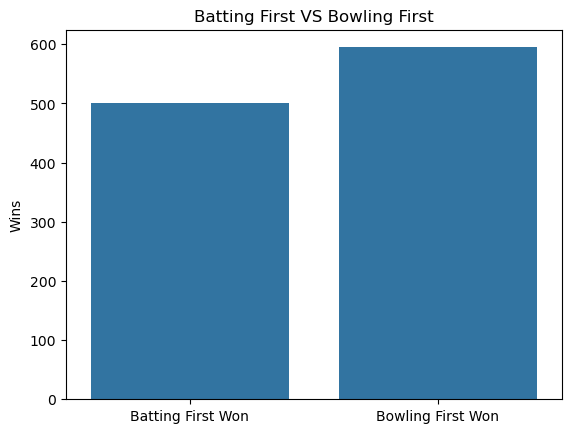

In [54]:
sns.countplot(data=matches,x='result_by_inning')
plt.title('Batting First VS Bowling First')
plt.xlabel('')
plt.ylabel('Wins')
plt.show()

**Insight:**
Bowling first teams have won slightly more matches than batting first teams, indicating a mild advantage for chasing in IPL.

### Matches Per Season (Seasonal Trend)


In [55]:
seasons=matches['season'].value_counts().sort_index()
seasons

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

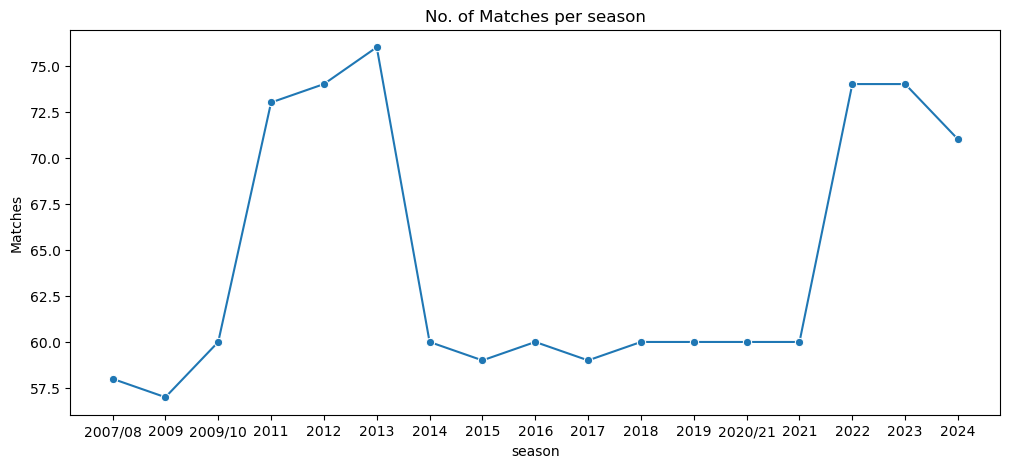

In [56]:
plt.figure(figsize=(12,5))
sns.lineplot(x=seasons.index,y=seasons.values,marker='o')
plt.title('No. of Matches per season')
plt.ylabel('Matches')
plt.show()

**Insight:**
The number of IPL matches increased significantly between 2010 and 2013, reflecting league expansion. This was followed by a long phase of relatively stable seasons with around 60 matches per year, before a sharp increase from 2022 onwards due to the introduction of additional teams. A slight drop in 2024 indicates minor scheduling adjustments rather than a structural change.

### Win Margin Distribution Across Top Venues


In [57]:
top_venues= matches['city'].value_counts().head(5).index
top_venues_df = matches[matches['city'].isin(top_venues) & matches['result'].isin(['runs','wickets'])]

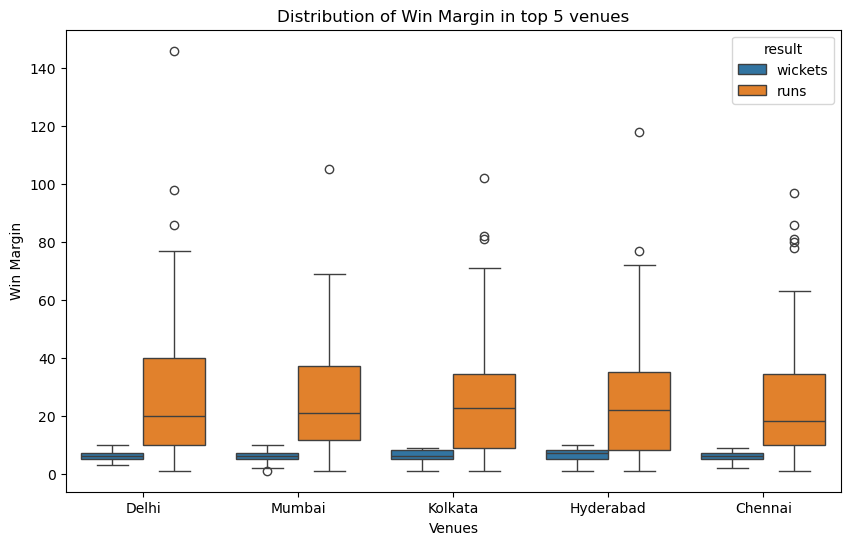

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=top_venues_df,x='city',y='result_margin',hue='result')
plt.title('Distribution of Win Margin in top 5 venues')
plt.xlabel('Venues')
plt.ylabel('Win Margin')
plt.show()

**Insight:**  
Across major IPL venues, matches won by runs exhibit significantly higher variability in win
margins compared to matches won by wickets. Wicket-based victories are generally more consistent,
while run-based wins occasionally result in highly one-sided outcomes, reflected by large outliers.
